In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
dataset= pd.read_csv('weatherHistory.csv')
print(dataset.shape)

(96453, 12)


In [13]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [14]:
col=['Loud Cover','Humidity']
df = dataset.drop(col,axis=1)
df.describe()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,63.852600,359.000000,16.100000,1046.380000


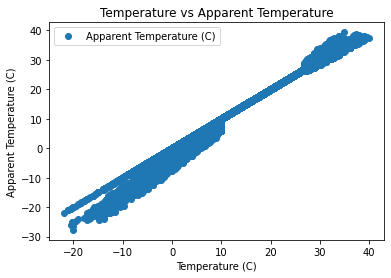

In [15]:
dataset.plot(x='Temperature (C)', y='Apparent Temperature (C)' , style='o')
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()

In [56]:
# dataset.plot(x='Wind Speed (km/h)', y='Visibility (km)' , style='o')
# plt.title('wind speed vs visibility')
# plt.xlabel('Wind Speed (km/h)')
# plt.ylabel('Visibility (km)')
# plt.show()

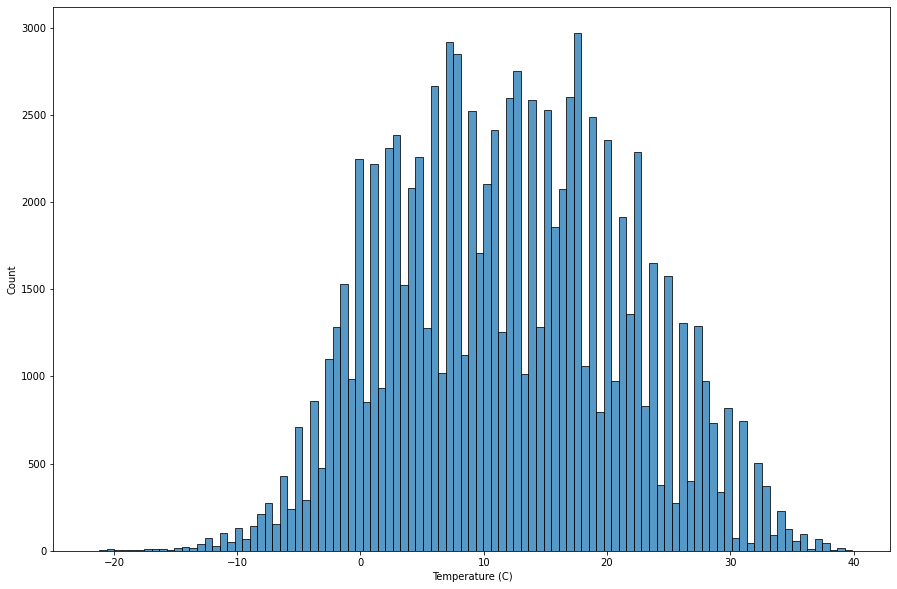

In [57]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.histplot(dataset['Temperature (C)'])
plt.show()

In [58]:
X= dataset['Temperature (C)'].values.reshape(-1,1)
y= dataset['Apparent Temperature (C)'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

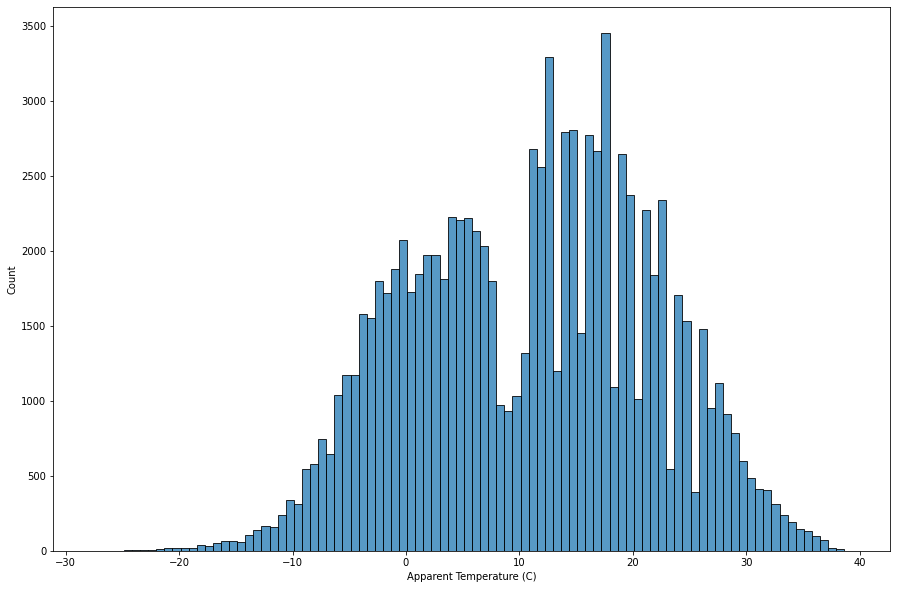

In [59]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.histplot(dataset['Apparent Temperature (C)'])
plt.show()

In [60]:
print(X_train)
print(y_train)

[[ 0.02222222]
 [-6.2       ]
 [ 7.27222222]
 ...
 [13.57777778]
 [17.63888889]
 [13.83333333]]
[[-3.48888889]
 [-6.2       ]
 [ 7.27222222]
 ...
 [13.57777778]
 [17.63888889]
 [13.83333333]]


In [61]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [62]:
model.score(X_test,y_test)

0.9851730033596017

In [63]:
y_pred=model.predict(X_test)

In [64]:
df=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

          Actual  Predicted
0      14.422222  13.620907
1      12.155556  11.100441
2      23.961111  24.227868
3      15.000000  14.263379
4      12.800000  11.817044
...          ...        ...
19286  28.255556  29.707410
19287  17.216667  16.728246
19288  -1.000000  -3.528145
19289   7.327778   5.732096
19290  16.061111  15.443303

[19291 rows x 2 columns]
